# Trabalho Prático 3

**Nome:** Vítor L. G. Silva <br>

**Matrícula:** 3045

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# Leitura dos dados

In [2]:
train = pd.read_csv('data/train.csv', index_col='id')
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [3]:
test = pd.read_csv('data/test.csv', index_col='id')
display(test.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
id,,,,,,,,,,,,,,,,,,,,,
5,A,F,A,A,F,BI,A,AH,AX,A,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
6,A,H,C,A,E,AB,I,F,N,A,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
8,A,N,C,A,F,AB,A,AH,BC,A,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
9,B,L,C,A,F,BI,A,E,AX,A,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
11,A,F,A,B,F,BI,A,AH,I,A,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [4]:
submission = pd.read_csv('data/sample_submission.csv', index_col='id')
display(submission.head())

,target
id,
5,0.5
6,0.5
8,0.5
9,0.5
11,0.5


## Codificação das categorias

In [5]:
for c in train.columns:
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)
        
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,8,0,1,1,33,0,44,54,0,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,0,8,0,0,4,33,8,48,3,5,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,0,10,0,0,4,33,0,30,38,9,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,0,10,0,2,4,33,0,50,3,5,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,0,8,6,1,4,33,2,32,54,0,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


## Pull out the target, and make a validation split

In [6]:
target = train.pop('target')
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.60)

# Simple Random Forest

In [7]:
clf = RandomForestClassifier(n_estimators=200, max_depth=7, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1] # This grabs the positive class prediction
score = roc_auc_score(y_test, y_pred)
print(f'{score:0.5f}') # 0.87323 shows we're doing better than a dummy model

0.87546


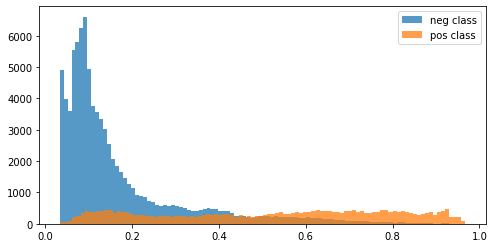

In [11]:
plt.figure(figsize=(8,4))
plt.hist(y_pred[np.where(y_test == 0)], bins=100, alpha=0.75, label='neg class')
plt.hist(y_pred[np.where(y_test == 1)], bins=100, alpha=0.75, label='pos class')
plt.legend()
plt.show()

In [12]:
clf = RandomForestClassifier(n_estimators=200, max_depth=7, n_jobs=-1)
clf.fit(train, target)
submission['target'] = clf.predict_proba(test)[:, 1]
submission.to_csv('random_forest.csv')

# Naive Bayes and Decision Tree

In [8]:
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

In [20]:
def classifier(X_train, X_test, Y_train, Y_test):
    
    # Aplicando Naive Bayes
    print("[Naive Bayes]")
    nb=BernoulliNB()
    nb.fit(X_train,Y_train)
    print(classification_report(Y_test, nb.predict(X_test)))
    print()
    
    # Aplicando Arvore de Decisao
    print("[Árvore de Decisão]")
    dtc=tree.DecisionTreeClassifier()
    dtc.fit(X_train,Y_train)
    print(classification_report(Y_test, dtc.predict(X_test)))

In [21]:
classifier(X_train,X_test,y_train,y_test)

[Naive Bayes]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     88122
           1       0.56      0.48      0.52     31878

    accuracy                           0.76    120000
   macro avg       0.69      0.67      0.68    120000
weighted avg       0.75      0.76      0.76    120000


[Árvore de Decisão]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     88122
           1       0.56      0.58      0.57     31878

    accuracy                           0.77    120000
   macro avg       0.70      0.71      0.71    120000
weighted avg       0.77      0.77      0.77    120000



In [22]:
nb=BernoulliNB()
nb.fit(train, target)
nb.predict_proba(test)[:, 1]
submission['target'] = nb.predict_proba(test)[:, 1]
submission.to_csv('nb.csv')

In [23]:
dtc=tree.DecisionTreeClassifier()
dtc.fit(train,target)
dtc.predict_proba(test)[:, 1]
submission['target'] = dtc.predict_proba(test)[:, 1]
submission.to_csv('dtc.csv')

# Random Search

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
# Set up the sample space
learn_rate_list = np.linspace(0.001,2,150)
min_samples_leaf_list = list(range(1,51))

# Create the grid
parameter_grid = {
    'learning_rate' : learn_rate_list,
    'min_samples_leaf' : min_samples_leaf_list
}

# Define how many samples
number_models = 3

In [31]:
# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = parameter_grid,
    n_iter = number_models,
    scoring= 'accuracy',
    n_jobs=2,
    cv = 5,
    refit=True,
    return_train_score = True)

# Fit the object to our data
random_GBM_class.fit(train, target)
random_GBM_class.predict_proba(test)[:, 1]
submission['target'] = random_GBM_class.predict_proba(test)[:, 1]
submission.to_csv('random_GBM_class.csv')

In [32]:
print("[Random Search]")
random_GBM_class.fit(X_train, y_train)
print(classification_report(y_test, random_GBM_class.predict(X_test)))

[Random Search]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     88122
           1       0.76      0.61      0.68     31878

    accuracy                           0.85    120000
   macro avg       0.82      0.77      0.79    120000
weighted avg       0.84      0.85      0.84    120000

